# Workgroup 5: The Bootstrap

In this lab, we analyze the Pennsylvania re-employment bonus experiment, which was previously studied in "Sequential testing of duration data: the case of the Pennsylvania ‘reemployment bonus’ experiment" (Bilias, 2000), among others. These experiments were conducted in the 1980s by the U.S. Department of Labor to test the incentive effects of alternative compensation schemes for unemployment insurance (UI). In these experiments, UI claimants were randomly assigned either to a control group or one of five treatment groups. Actually, there are six treatment groups in the experiments. Here we focus on treatment group 4, but feel free to explore other treatment groups. In the control group the current rules of the UI applied. Individuals in the treatment groups were offered a cash bonus if they found a job within some pre-specified period of time (qualification period), provided that the job was retained for a specified duration. The treatments differed in the level of the bonus, the length of the qualification period, and whether the bonus was declining over time in the qualification period; see http://qed.econ.queensu.ca/jae/2000-v15.6/bilias/readme.b.txt for further details on data.

In [1]:
library(ISLR2)
set.seed(2)
library(boot)

Warning message:
"package 'ISLR2' was built under R version 4.1.2"


In [2]:
# loading data
Penn <- as.data.frame(read.table("../data/penn_jae.dat", header=T ))
n    <- dim(Penn)[1]
p_1  <- dim(Penn)[2]

In [3]:
# subsetting data
Penn <- subset(Penn, tg== 4| tg==0)
#attach(Penn)

In [4]:
# Convert T4 to dummy
T4   <- Penn$tg==4
T4   <- as.numeric(T4)
Penn <- cbind(Penn, T4)
head(Penn)

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld,T4
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,10824,0,18,18,0,0,0,0,2,0,...,0,0,0,0,0,0,0,1,0,0
4,10824,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12,10607,4,9,9,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
13,10831,0,27,27,0,0,0,0,1,0,...,0,0,0,1,1,0,1,0,0,0
14,10845,0,27,27,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [5]:
# a function to create bootstrap estimates for the intercept and slope terms by randomly sampling from among the observations
# with replacement
boot.fn <- function(data, index)
  coef(lm(log(inuidur1)~T4+(female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd), 
          data = data, subset = index))

In [6]:
# saving results
results <- boot(Penn, boot.fn, 1000)
results


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Penn, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
         original        bias    std. error
t1*   2.178462326  2.543807e-03  0.15825444
t2*  -0.071692484 -4.240281e-04  0.03580750
t3*   0.126368328 -8.729728e-04  0.03505499
t4*  -0.293767980 -2.534832e-03  0.05914147
t5*  -0.472445058  1.517142e-04  0.24895461
t6*   0.029866899  1.232161e-03  0.05457686
t7*   0.096186517 -3.844052e-03  0.04535747
t8*   0.073678072 -4.863035e-04  0.15716849
t9*  -0.038506537 -1.786909e-03  0.15640351
t10* -0.054949195 -6.738897e-04  0.15755969
t11* -0.144177912 -2.130279e-03  0.15501026
t12*  0.003361318  1.764173e-03  0.16854890
t13* -0.162772168 -1.392324e-03  0.03745889
t14*  0.229666708 -3.682948e-03  0.05622531
t15*  0.126557359 -1.616278e-03  0.04838833
t16* -0.175352572  1.669278e-03  0.04086332
t17* -0.105224727  6.151331e-05  0.04454744

In [7]:
# saving the model
m   <- log(inuidur1)~T4+(female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)
reg <- summary(lm(m, data = Penn))$coef

library(xtable)
table <- matrix(0, 3, 4)
table[1,1]   <- reg[2]
table[2,1]   <- reg[3]
table[3,1]   <- reg[4]


table[1,2]   <- reg[2,2]
table[2,2]   <- reg[3,2]
table[3,2]   <- reg[4,2]


table[1,3]   <- results$t0[2]
table[2,3]   <- results$t0[3]
table[3,3]   <- results$t0[4]

colnames(table) <- c("Coef_normal_reg", "S.E_normal_reg","Coef_boot","S.E_boot")
rownames(table) <- c("T4","Female", "Black")

tab <- xtable(table, digits = 3)
print(tab,type="latex") # set type="latex" for printing table in LaTeX
tab

% latex table generated in R 4.1.1 by xtable 1.8-4 package
% Wed Dec 08 08:55:02 2021
\begin{table}[ht]
\centering
\begin{tabular}{rrrrr}
  \hline
 & Coef\_normal\_reg & S.E\_normal\_reg & Coef\_boot & S.E\_boot \\ 
  \hline
T4 & -0.072 & 0.035 & -0.072 & 0.000 \\ 
  Female & 0.126 & 0.035 & 0.126 & 0.000 \\ 
  Black & -0.294 & 0.053 & -0.294 & 0.000 \\ 
   \hline
\end{tabular}
\end{table}


,Coef_normal_reg,S.E_normal_reg,Coef_boot,S.E_boot
,<dbl>,<dbl>,<dbl>,<dbl>
T4,-0.07169248,0.03546326,-0.07169248,0
Female,0.12636833,0.03482493,0.12636833,0
Black,-0.29376798,0.05297556,-0.29376798,0


## Part 2: 
- HTE of female*T4
- Causal Trees

First run an OLS regression to find the HTE of female*T4, remember that log(inuidur1) is the endogenous variable. Also use the HC2 correction.

In [8]:
library(lmtest)
library(sandwich)

mhte <- log(inuidur1)~(female+T4 + T4*female + black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)
m2 <- lm(mhte, data = Penn)
summary(m2)

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric





Call:
lm(formula = mhte, data = Penn)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6050 -0.9967  0.3132  1.0408  2.1014 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.186613   0.159153  13.739  < 2e-16 ***
female        0.096560   0.042753   2.259 0.023954 *  
T4           -0.106729   0.045906  -2.325 0.020115 *  
black        -0.294966   0.052983  -5.567 2.72e-08 ***
othrace      -0.468157   0.198421  -2.359 0.018341 *  
factor(dep)1  0.028541   0.054149   0.527 0.598160    
factor(dep)2  0.095594   0.046863   2.040 0.041414 *  
q2            0.079211   0.156887   0.505 0.613654    
q3           -0.033300   0.156531  -0.213 0.831540    
q4           -0.049572   0.156617  -0.317 0.751625    
q5           -0.138087   0.155964  -0.885 0.375992    
q6            0.005999   0.166463   0.036 0.971254    
agelt35      -0.164546   0.036993  -4.448 8.85e-06 ***
agegt54       0.228579   0.059176   3.863 0.000114 ***
durable       0.126556   0.

In [9]:
HCV.coefs <- vcovHC(m2, type = 'HC2')
m2.se <- sqrt(diag(HCV.coefs))[18] # Estimated std errors
confint(m2)[18,]

2.5 %      97.5 % 
-0.05486239  0.22869512

We can see that the effect of the treatment is positive for women (0.086) in comparison to men but not significant, even when adjusting the standard errors.

### Replicate the causal tree estimation. 
Use the next specification or formula:

log(inuidur1) ~ T4+ female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)

In [10]:
library(causalTree)
library(grf)
library(rpart)
library(glmnet)
library(splines)
library(MASS)
library(ggplot2)

Loading required package: rpart

Loading required package: rpart.plot

Loading required package: data.table

Loading required package: Matrix

Loaded glmnet 4.1-2


Attaching package: 'MASS'


The following object is masked from 'package:ISLR2':

    Boston




In [11]:
# Treatment: T4 indicates the treatment group(bonus amount-qualification period) of each claimant.
treatment  <- "T4"
#Outcome: induidur1 indicates a mesuare of (in weeks) of the first spell of unemployment
outcome    <- "log(inuidur1)"
# Additional covariates
covariates <- c("female","black","othrace","factor(dep)","q2","q3","q4","q5","q6","agelt35","agegt54","durable","lusd","husd")

### Replicate the causal tree estimation:
Use the next specification or formula

log(inuidur1)~T4+ (female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)

### Short questions and answers
1. Why we need to partitionate the data in three sets?

According to Athey et al. (2016), we need to partitionate the data because we want to use the "honest" approach. It means that we want to estimate the causal effects in the leaves of a tree of an sample different from the one used to built and cross-validate the tree. The idea, then, is to divide the sample into three subsets (not necessarily of equal size). The splitting subset is used to fit a decision tree whose objective is modified to maximize heterogeneity in treatment effect estimates across leaves. The estimation in each subset is then used to produce a valid estimate of the treatment effect at each leaf of the fitted tree.


2. Why do we need to use the honest.causalTree function?

The honest approach is used in order to dodge the problem of adaptative estimation (Athey & Imbens, 2015). That is, that individual with extreme values of $Y_i$ are concentrated on a leaf such that the sample means in the training group are higher than the means of the effect of the treatment in other independent samples. However, this comes with the cost of less power due to less observations in the test subset.

3. Explain in detail the creation of the tree and how do you choose the optimal pruned tree

- First, we divide the data into three subsets: one to determinate the optimal leaves, one to estimate the effect of each one of them and one to test to validate its optimality. 
- With subset, we fit the forest. It means, we create a number of trees, according to a formula, using bagging: using cross-validation to try different subspaces of the covariates in order to find the optimal number of leaves. We limited the number of leaves by certain smooth criteria, but we haven't prunned yet. 
- For each set of covariates, we have cross-validated the observations the number of optimal leaves in order to find the optimal number of trees for each subset. In other words, we have divided the sample into folds and estimated the RSE in the training sample. After it, we select the optimal complexity parameter to prune the tree and with it, the optimal number of leaves.

In [12]:
# defining the formula
# fmla <- paste(outcome, "~", treatment, "+" , paste(covariates, collapse = " + "))
# fmla
fmla<-paste("log(inuidur1)~T4+(female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)")
fmla

[1] "log(inuidur1)~T4+(female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)"

In [13]:
# Dividing data into three subsets
indices <- split(seq(nrow(Penn)), sort(seq(nrow(Penn)) %% 3))
names(indices) <- c('split', 'est', 'test')

In [14]:
# Fitting the forest
ct.unpruned <- honest.causalTree(
  formula          = fmla,            # Define the model
  data             = Penn[indices$split, ],
  treatment        = Penn[indices$split, treatment],
  est_data         = Penn[indices$est, ],
  est_treatment    = Penn[indices$est, treatment],
  minsize          = 1,                 # Min. number of treatment and control cases in each leaf
  HonestSampleSize = length(indices$est), #  Num obs used in estimation after splitting
  
  # We recommend not changing the parameters below
  split.Rule="CT",            # Define the splitting option
  cv.option="TOT",            # Cross validation options
  cp=0,                       # Complexity parameter
  split.Honest=TRUE,          # Use honesty when splitting
  cv.Honest=TRUE              # Use honesty when performing cross-validation
)

[1] 2
[1] "CT"


In [15]:
# Table of cross-validated values by tuning parameter.
ct.cptable <- as.data.frame(ct.unpruned$cptable)

# Obtain optimal complexity parameter to prune tree.
cp.selected <- which.min(ct.cptable$xerror)
cp.optimal <- ct.cptable[cp.selected, "CP"]

# Prune the tree at optimal complexity parameter.
ct.pruned <- prune(tree=ct.unpruned, cp=cp.optimal)

# Predict point estimates (on estimation sample)
tau.hat.est <- predict(ct.pruned, newdata=Penn[indices$est,])

# Create a factor column 'leaf' indicating leaf assignment in the estimation set
num.leaves <- length(unique(tau.hat.est))
leaf <- factor(tau.hat.est, levels=sort(unique(tau.hat.est)), labels = seq(num.leaves))

Plotting the three

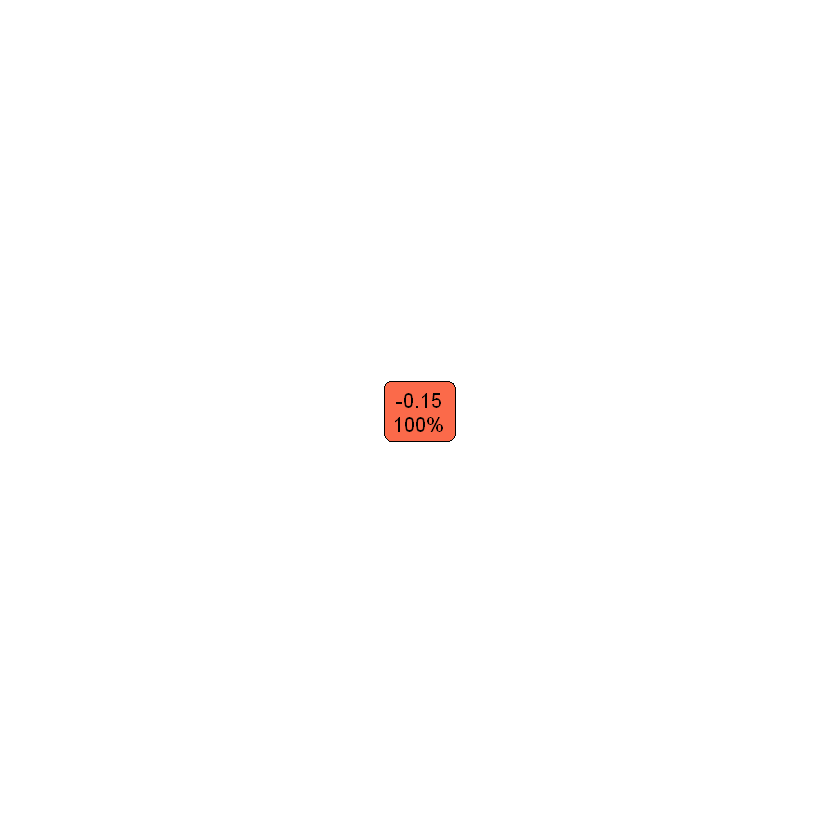

In [16]:
rpart.plot(
  x=ct.pruned,        # Pruned tree
  type=3,             # Draw separate split labels for the left and right directions
  fallen=TRUE,        # Position the leaf nodes at the bottom of the graph
  leaf.round=1,       # Rounding of the corners of the leaf node boxes
  extra=100,          # Display the percentage of observations in the node
  branch=.1,          # Shape of the branch lines
  box.palette="RdBu") # Palette for coloring the node

We found a problem when plotting the pruned tree. When running the same script in R, we got the right results.